<a href="https://colab.research.google.com/github/ultype/Architecture-mips/blob/main/Q36101317_Lab1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###1. Implement the following layers as python functions(both forward and backward propagation)	
* Inner-product layer
* Activation layer(Sigmoid or Rectified)
* Softmax layer

###2. Implement training and testing process
* included cross-validation

###3. Plot epoch-accuracy curves


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
#%cd /content/drive/MyDrive/AI_lab1 
%cd /content/drive/MyDrive/AI2022_course/AI_lab1
%ls

/content/drive/MyDrive/AI2022_course/AI_lab1
mnist_test.csv  mnist_train.csv  Q36101317_Lab1.ipynb


In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
# load MNIST dataset 
image_size = 28           # width and length
no_of_different_labels = 10     #  i.e. 0, 1, 2, 3, ..., 9
image_pixels = image_size * image_size
train_data = np.loadtxt("./mnist_train.csv", delimiter=",")
test_data = np.loadtxt("./mnist_test.csv", delimiter=",") 

# data preprocessing

# map pixels information from range(0, 255) to range(0.01, 1)
fac = 0.99 / 255
train_imgs = np.asfarray(train_data[:, 1:]) * fac + 0.01
test_imgs = np.asfarray(test_data[:, 1:]) * fac + 0.01

train_labels = np.asfarray(train_data[:, :1])
test_labels = np.asfarray(test_data[:, :1])

lr = np.arange(no_of_different_labels)

# transform labels into one hot representation
train_labels_one_hot = (lr==train_labels).astype(np.float64)
test_labels_one_hot = (lr==test_labels).astype(np.float64)


In [5]:
# Separate train_imgs, train_labels into training and validation 
# x_size = 1  x 784
# w_size = 10 x 784
rate     = 0.001 
ifm_size = 784
ofm_size = 10
   
batchs_num = 600
batch_size = 100
epochs     = batchs_num  
# split row

x_train = train_imgs
# one hot
y_train = []
for label in train_labels:
  label = int(label)
  y = np.zeros(ofm_size)
  y[label] = 1.0 
  y_train.append(y)
y_train = np.array(y_train)


x_batchs = []
y_batchs = []
train_label_batchs = []
for i in range(batchs_num):
  x_batchs.append(x_train[i*batch_size:(i+1)*batch_size])
  y_batchs.append(y_train[i*batch_size:(i+1)*batch_size])
  train_label_batchs.append(train_labels[i*batch_size:(i+1)*batch_size])

x_batchs = np.array(x_batchs)
y_batchs = np.array(y_batchs)
train_label_batch = np.array(train_label_batchs)

x_test = test_imgs
y_test = []
for label in test_labels:
  label = int(label)
  y = np.zeros(ofm_size)
  y[label] = 1.0 
  y_test.append(y)
y_test = np.array(y_test)

input.shape (600, 100, 784)
target.shape (600, 100, 10)
Epoch: 0
Test Accuracy: 77.14 %
Epoch: 1
Test Accuracy: 81.86 %
Epoch: 2
Test Accuracy: 83.64 %
Epoch: 3
Test Accuracy: 84.61 %
Epoch: 4
Test Accuracy: 85.39999999999999 %
Epoch: 5
Test Accuracy: 85.89 %
Epoch: 6
Test Accuracy: 86.46000000000001 %
Epoch: 7
Test Accuracy: 86.76 %
Epoch: 8
Test Accuracy: 86.87 %
Epoch: 9
Test Accuracy: 87.15 %
Epoch: 10
Test Accuracy: 87.33999999999999 %
Epoch: 11
Test Accuracy: 87.47 %
Epoch: 12
Test Accuracy: 87.64999999999999 %
Epoch: 13
Test Accuracy: 87.94999999999999 %
Epoch: 14
Test Accuracy: 88.05 %
Epoch: 15
Test Accuracy: 88.2 %
Epoch: 16
Test Accuracy: 88.33 %
Epoch: 17
Test Accuracy: 88.46000000000001 %
Epoch: 18
Test Accuracy: 88.55 %
Epoch: 19
Test Accuracy: 88.66000000000001 %
Epoch: 20
Test Accuracy: 88.72 %
Epoch: 21
Test Accuracy: 88.73 %
Epoch: 22
Test Accuracy: 88.75 %
Epoch: 23
Test Accuracy: 88.74 %
Epoch: 24
Test Accuracy: 88.66000000000001 %
Epoch: 25
Test Accuracy: 88.759999

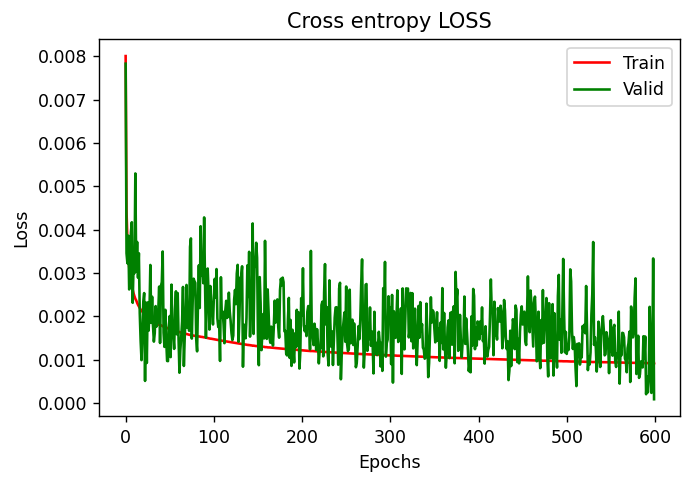

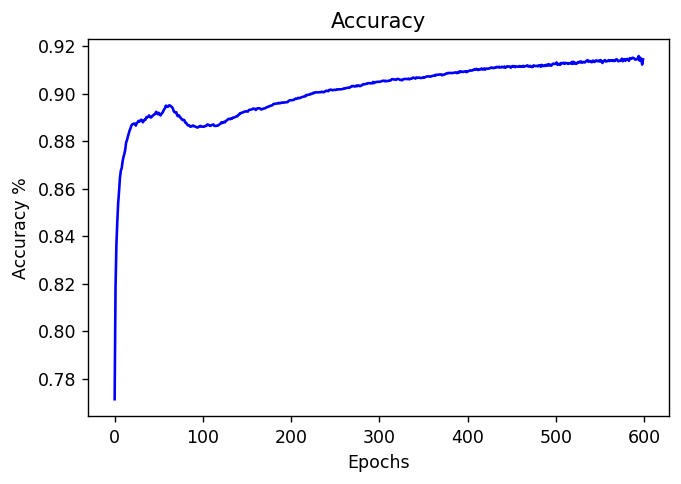

In [6]:
class NeuralNetwork:
    def __init__(self, X, y, train_label_batchs, test_x, test_y, test_labels, batch = 64, lr = 1e-3,  epochs = 50):
        self.input = X 
        self.target = y
        self.batch = batch
        self.epochs = epochs
        self.lr = lr
        self.train_label_batchs = train_label_batchs
    
        self.test_x = test_x
        self.test_y = test_y
        self.test_labels = test_labels 
        

        self.x = self.input[:self.batch] # batch input 
        self.y = self.target[:self.batch] # batch target value

        self.train_mse_loss = []
        self.train_ce_loss  = []
        self.valid_acc      = []
        self.test_acc       = []
        self.valid_mse_loss = []
        self.valid_ce_loss  = []
        print("input.shape", self.input.shape)  #input.shape (600, 100, 784)
        print("target.shape", self.target.shape) #target.shape (600, 100, 10)
        #assert 0
        self.init_weights()

    def init_weights(self):
        self.W1 = np.random.randn(self.input.shape[2],256)
        self.W2 = np.random.randn(256,128)
        self.W3 = np.random.randn(128,self.target.shape[2])

        self.b1 = np.random.randn(256,)
        self.b2 = np.random.randn(128,)
        self.b3 = np.random.randn(10,)

    def Rectified_ForProp(self, x):
        return np.maximum(0,x)

    def dReLU(self,x):
        return 1 * (x > 0) 
 
    def Rectified_BackProp(self, dEdx, x):
        dz = 1 * (x>0)
        dEdy = dEdx * dz
        #print(dEdy.shape)
        return dEdy
    
    def Softmax_ForProp(self, z):
        z = z - np.max(z, axis = 1).reshape(z.shape[0],1)
        return np.exp(z) / np.sum(np.exp(z), axis = 1).reshape(z.shape[0],1)

    def Softmax_BackProp(self, y, t):
        dEdx = (y-t)
        return dEdx

    def InnerProduct_ForProp(self, x,W,b):
        y =  x.dot(W) + b
        return y

    def InnerProduct_BackProp(self, dEdy, x, W):
        # dEdy is row vec
        dEdx = np.dot(dEdy, W.T)
        dEdw = np.dot(dEdy.T, x).T
        dEdb = np.sum(dEdy, axis = 0)
        return dEdx,dEdw,dEdb

    def Sigmoid_ForProp(self, x):
        y = np.ones(x.shape)/(np.exp(-x)+1)
        return y

    def Sigmoid_BackProp(self, dEdy, x):
      dEdy = x * (1/(1+np.exp(-x))*(1-1/(1+np.exp(-x))))
      return dEdy

    # Forward-propagation
    def forwardprop(self):
        #assert self.x.shape[1] == self.W1.shape[0]
        self.z1 = self.InnerProduct_ForProp(self.x,self.W1,self.b1)
        self.a1 = self.Rectified_ForProp(self.z1)

        #assert self.a1.shape[1] == self.W2.shape[0]
        self.z2 = self.InnerProduct_ForProp(self.a1,self.W2,self.b2)
        self.a2 = self.Rectified_ForProp(self.z2)

        #assert self.a2.shape[1] == self.W3.shape[0]
        self.z3 = self.InnerProduct_ForProp(self.a2,self.W3,self.b3)
        self.a3 = self.Softmax_ForProp(self.z3)
        self.error = self.a3 - self.y

    # Bakcward-propagation
    def backprop(self):
        dEdy3 = (1/self.batch) * self.Softmax_BackProp(self.a3, self.y)
        dEdx3, dEdw3, dEdb3 = self.InnerProduct_BackProp(dEdy3, self.a2, self.W3)
        dEdy2 = self.Rectified_BackProp(dEdx3, self.z2)
        dEdx2, dEdw2, dEdb2 = self.InnerProduct_BackProp(dEdy2, self.a1, self.W2)
        dEdy1 = self.Rectified_BackProp(dEdx2, self.z1)
        dEdx1, dEdw1, dEdb1 = self.InnerProduct_BackProp(dEdy1, self.x, self.W1)

        self.W3 = self.W3 - self.lr * dEdw3
        self.W2 = self.W2 - self.lr * dEdw2
        self.W1 = self.W1 - self.lr * dEdw1
        
        self.b3 = self.b3 - self.lr * dEdb3
        self.b2 = self.b2 - self.lr * dEdb2
        self.b1 = self.b1 - self.lr * dEdb1


    def validation(self, idx):
        #assert self.x.shape[1] == self.W1.shape[0]
        self.z1 = self.InnerProduct_ForProp(self.input[idx],self.W1,self.b1)
        self.a1 = self.Rectified_ForProp(self.z1)

        #assert self.a1.shape[1] == self.W2.shape[0]
        self.z2 = self.InnerProduct_ForProp(self.a1,self.W2,self.b2)
        self.a2 = self.Rectified_ForProp(self.z2)

        #assert self.a2.shape[1] == self.W3.shape[0]
        self.z3    = self.InnerProduct_ForProp(self.a2,self.W3,self.b3)
        self.a3    = self.Softmax_ForProp(self.z3)
        val = self.a3 - self.target[idx]
        self.valid_mse_loss.append(np.mean(val**2))
        self.valid_ce_loss.append(self.cross_entropy_loss(self.a3, self.train_label_batchs[idx]))
        
        acc = np.count_nonzero((np.argmax(self.a3,axis=1) == np.argmax(self.y,axis=1))) / (self.batch)
        #print(self.a3)
        #print(np.argmax(self.a3,axis=1))
        #print(self.target[idx])
        #print(np.argmax(self.y,axis=1))
        self.valid_acc.append(acc)
        #print("Validation Accuracy:", 100 * acc, "%")
        #assert 0

    def train(self):
        for epoch in range(self.epochs):
            l = 0
            acc = 0
            for batch in range(self.input.shape[0]//self.batch-1):
                start = batch*self.batch
                end = (batch+1)*self.batch
                self.x = self.input[start:end]
                self.y = self.target[start:end]
                self.forwardprop()
                self.backprop()
                l+=np.mean(self.error**2)
                acc+= np.count_nonzero(np.argmax(self.a3,axis=1) == np.argmax(self.y,axis=1)) / self.batch
            self.loss.append(l/(self.input.shape[0]//self.batch))
            self.acc.append(acc*100/(self.input.shape[0]//self.batch))
            
    
    def train_cross_valid(self):
        # Cross Valitation
        for epoch_idx in range(self.epochs):
        #for epoch_idx in range(10):
            print("Epoch:",epoch_idx)
            epoch_idx = (epoch_idx + self.epochs-1) % self.epochs
            train_mse_loss = 0
            train_ce_loss = 0
            train_acc = 0
            batch_idx = 0
            valid_batch_x = self.input[epoch_idx]
            valid_batch_y = self.target[epoch_idx]
            valid_labels  = self.train_label_batchs[epoch_idx]
            for batch_idx in range(batchs_num):
              if(batch_idx != epoch_idx):
                self.x = self.input[batch_idx]
                self.y = self.target[batch_idx]
                #forward
                self.forwardprop()
                #update weight
                self.backprop()
                #MSE loss
                self.forwardprop()
                train_mse_loss += np.mean(self.error**2)
                #train Cross entropy loss
                train_ce_loss += self.cross_entropy_loss(self.a3, self.train_label_batchs[batch_idx])
                #train accuracy
                train_acc += np.count_nonzero(np.argmax(self.a3,axis=1) == np.argmax(self.y,axis=1)) / self.batch
                #assert 0
            val = self.validation(epoch_idx)
            self.train_mse_loss.append(train_mse_loss/self.epochs)
            self.train_ce_loss.append(train_ce_loss/self.epochs)
            #self.train_acc.append(train_acc/self.epochs)
            self.test(self.test_x, self.test_y)
            #self.loss.append(l/(self.epochs))
            #self.acc.append(acc*100/self.epochs)
            

    # plot accuracy and loss curves
    def cross_entropy_loss(self, yHat, labels):
      idx = 0
      temp = []
      t =  np.log(000.1)
      for label in labels:
        prob = yHat[int(idx)][int(label)]
        if(prob > 000.1):
          temp.append(np.log(yHat[int(idx)][int(label)]))
        else:
          temp.append(t)
        idx = idx +1
        #assert 0
      temp = np.array(temp)
      loss = -np.mean(temp)/temp.shape[0]
      return loss

    def plot_CE(self):
        plt.figure(dpi = 125)
        plt.title('Cross entropy LOSS')
        plt.plot(self.train_ce_loss, color = 'r',  label = "Train")
        plt.plot(self.valid_ce_loss, color = 'g',  label = "Valid")
        #plt.plot(self.valid, color = 'b', label = "Valid Loss")
        plt.legend()
        plt.xlabel("Epochs")
        plt.ylabel("Loss")

    def plot_mse(self):
        plt.figure(dpi = 125)
        plt.title('MSE LOSS')
        plt.plot(self.train_mse_loss, color = 'r',  label = "Train")
        plt.plot(self.valid_mse_loss, color = 'g',  label = "Valid")
        #plt.plot(self.valid, color = 'b', label = "Valid Loss")
        plt.legend()
        plt.xlabel("Epochs")
        plt.ylabel("Loss")
    
    def acc_plot(self):
        plt.figure(dpi = 125)
        plt.title("Accuracy")
        # plt.plot(self.valid_acc, color = 'r',  label = "Valid")
        plt.plot(self.test_acc, color = 'b',  label = "Test")
        plt.xlabel("Epochs")
        plt.ylabel("Accuracy %")
    
    # Using test_images and test_labels to do the final test
    def test(self,xtest,ytest):
        self.x = xtest
        self.y = ytest
        self.forwardprop()
        acc = np.count_nonzero((np.argmax(self.a3,axis=1) == np.argmax(self.y,axis=1))) / (self.a3.shape[0])
        self.test_acc.append(acc)
        print("Test Accuracy:", 100 * acc, "%")
        
        
# Main 
NNT = NeuralNetwork(x_batchs, y_batchs, train_label_batchs, x_test, y_test, test_labels, batch=batch_size, lr=0.001, epochs=epochs)
NNT.train_cross_valid()
#NNT.plot_mse()
NNT.plot_CE()
NNT.acc_plot()
NNT.test(x_test,y_test)